## Diabetes Linear Regression Project

### Data Set

Dataset containing of females at least 21 years old of Pima Indian heritage.
Dataset obtained from Kaggle, available here: https://www.kaggle.com/datasets/mathchi/diabetes-data-set.
Dataset originally taken from larger datasbase from the National Institute of Diabetes and Digestive and Kidney Diseases.

Dataset contains the columns:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration, 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg / (height in m)^2)
- DiabetesPedigreeFunction: Probability of diabetes based on family history
- Age: Age in years
- Outcome: Presence of diabetes (0 or 1)

### Findings

From performing operations on this data I have found that many of these fields have no correlation between them. For example, there seems to be no accurate link between blood pressure and skin thickness.
However, there are some fields here where a noticable correlation is present. For example, BMI and skin thickness. There is a noticable trend of increased skin thickness as BMI rises.

Findings like this could have clinical relevance. For example, the correlation found between BMI and skin thickness could suggest that monitoring BMI could be important for assessing skin-related health issues.

I think the data here shows the limitations of linear regression as many of the pieces of data have no linear correlation between them. Perhaps a different machine learning model could find a more consistent pattern that could be used for accurate predictions.

There could potentially be many other variables that could affect these data values that haven't been considered in this dataset, such as height.

In [1]:
# import all required libraries

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
import ipywidgets as widgets
from IPython.display import display


In [2]:
# read data from the csv file
# remove any outliers where the data is 0 when it shouldn't be

df_raw = pd.read_csv('diabetes.csv')
df = df_raw[(df_raw['Glucose'] > 0) & (df_raw['BloodPressure'] > 0) & (df_raw['SkinThickness'] > 0) & (df_raw['Insulin'] > 0) & (df_raw['BMI'] > 0) & (df_raw['DiabetesPedigreeFunction'] > 0)]

In [3]:
# dropdown to select target column

target_dropdown = widgets.Dropdown(
    options = df.columns,
    description = 'Target:',
    disabled = False,
)

display(target_dropdown)

Dropdown(description='Target:', options=('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin'…

In [4]:
# dropdown to select feature columns

feature_dropdown = widgets.Dropdown(
    options = df.columns,
    description = 'Feature:',
    disabled = False,
)

display(feature_dropdown)

Dropdown(description='Feature:', options=('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin…

In [5]:
# reshape x axis to be a 2D array for scikit-learn operations
# get data values as a NumPy array

selected_target = target_dropdown.value
selected_feature = feature_dropdown.value  

x = df[selected_feature].values.reshape(-1, 1)
y = df[selected_target].values

In [6]:
# randomly select data to split into training and test data, 80% training data, 20% test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 37)


In [7]:
# fit linear regression model 
# predict values for line of best fit

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

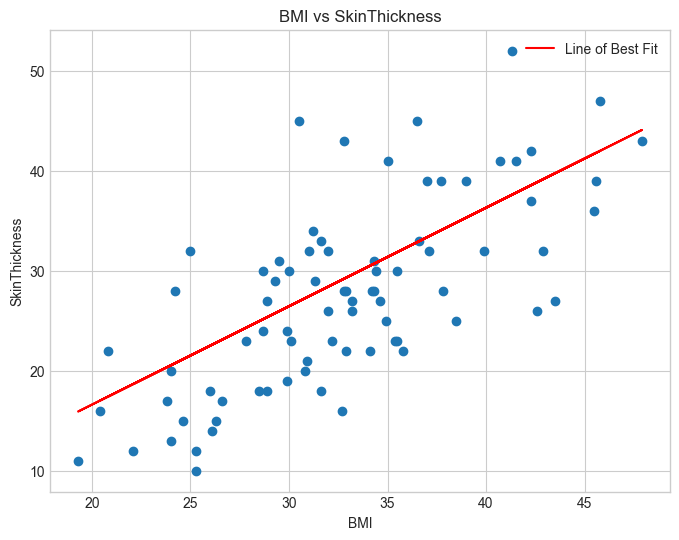

In [8]:
# plot data points and line of best fit

plt.figure(figsize = (8, 6))
plt.scatter(x_test, y_test) 
plt.plot(x_test, y_pred, color = 'red', label = 'Line of Best Fit')
plt.xlabel(selected_feature)
plt.ylabel(selected_target)
plt.title(f"{selected_feature} vs {selected_target}")
plt.legend()
plt.show()



In [9]:
# slope of line of best fit, telling us the nature of the relationship

print("Model slope:", model.coef_[0])

Model slope: 0.9841741698316796


In [10]:
# analysis on accuracy
# mean absolute error: average absolute difference between predicted values and actual values, lower mae indicates better model performance
# root mean squared error: average magnitude of errors between predicted values and actual values, lower rmse indicates better model performance
# R²: proportion of variance in the target variable that can be explained by the model, ranges from 0-1, higher R² indicates better model performance

mae = mean_absolute_error(y_test, y_pred)
mse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 5.6837461798694005
Mean Squared Error: 6.8389928710477195
R² Score: 0.4649303804242435
